In [8]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import pandas as pd
import corner

In [2]:
dat = h5py.File("LVK_lowspin/GW190425_Pv2NRTidalv2_LowSpin.hdf5")

In [11]:
results = dict()
for run in ["High", "Low"]:
    dat = h5py.File(f"LVK_{run.lower()}spin/GW190425_Pv2NRTidalv2_{run}Spin.hdf5")
    results[run] = pd.DataFrame()
    for param in dat['posterior'].keys():
        results[run][param] = dat['posterior'][param][()]

/tmp/ipykernel_1896798/1741933499.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  results[run][param] = dat['posterior'][param][()]
/tmp/ipykernel_1896798/1741933499.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  results[run][param] = dat['posterior'][param][()]
/tmp/ipykernel_1896798/1741933499.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

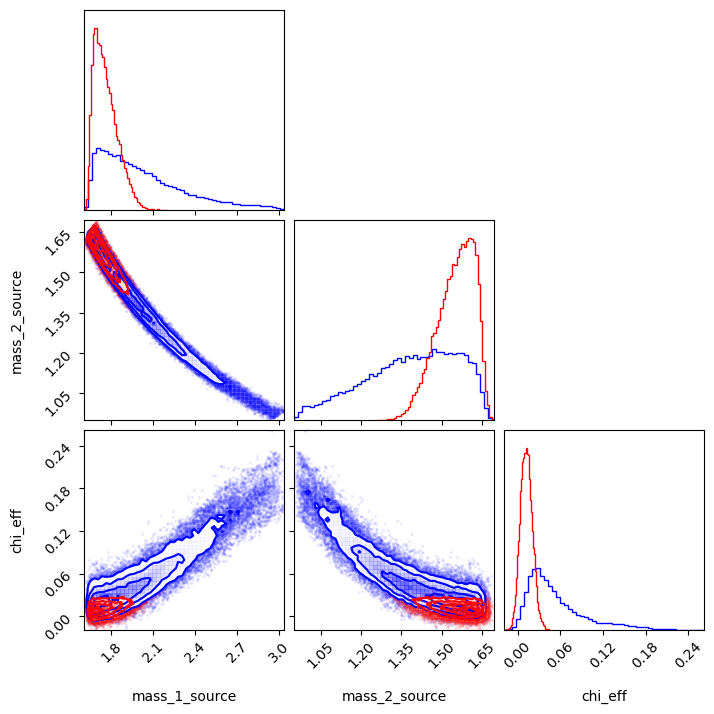

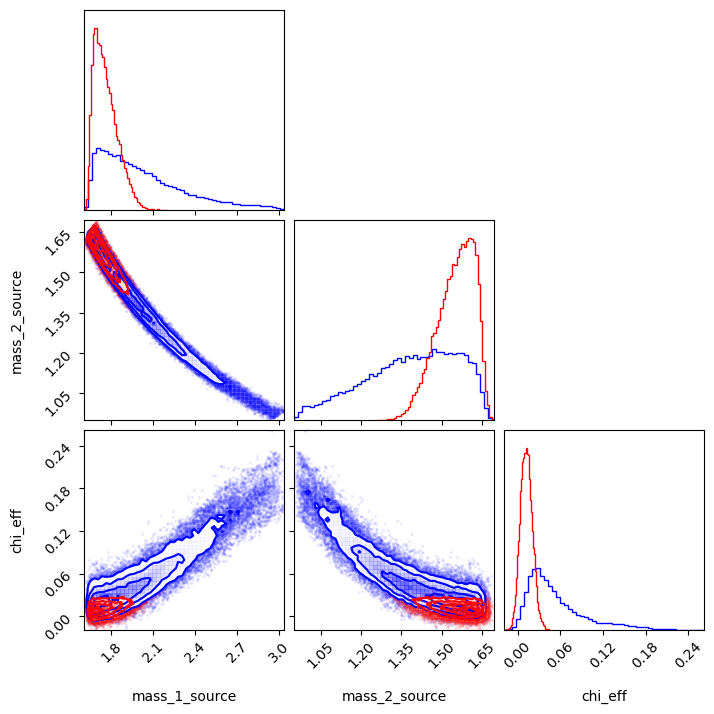

In [17]:
fig=corner.corner(results["High"], var_names=["mass_1_source", "mass_2_source", "chi_eff"], color='b', plot_density=True, bins=50, hist_kwargs={'density':True})
corner.corner(results["Low"], var_names=["mass_1_source", "mass_2_source", "chi_eff"], color='r', fig=fig,plot_density=True, bins=50, hist_kwargs={'density':True})


In [19]:
spin_cuts = [0.05, 0.1, 0.2, 0.4]
spin_posteriors = dict()
for spin in spin_cuts:
    spin_posteriors[spin] = pd.DataFrame()
    mask = (results["High"]["a_1"] < spin) & (results["High"]["a_2"] < spin)
    for key in results["High"].keys():
        spin_posteriors[spin][key] = results["High"][key][mask]

/tmp/ipykernel_1896798/2608401437.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  spin_posteriors[spin][key] = results["High"][key][mask]
/tmp/ipykernel_1896798/2608401437.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  spin_posteriors[spin][key] = results["High"][key][mask]
/tmp/ipykernel_1896798/2608401437.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

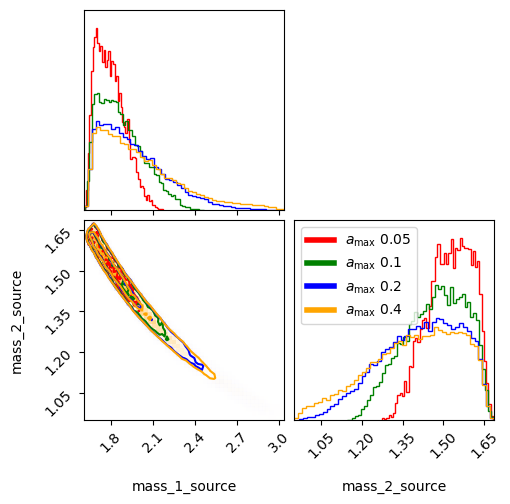

In [29]:
# Define the colors and labels for the legend
colors = ['r', 'g', 'b', 'orange', 'lavender', 'maroon']
labels = [r"$a_{\rm max}$ " + str(spin) for spin in spin_cuts]
levels=[0.393, 0.865]
# Create the corner plot for the first dataset
fig = corner.corner(spin_posteriors[0.05], var_names=["mass_1_source", "mass_2_source"], 
                    color=colors[0], plot_density=True, bins=50, hist_kwargs={'density': True}, levels=levels, plot_datapoints=False)

# Loop through the remaining datasets and add them to the plot
for ii, spin in enumerate(spin_cuts[1:], start=1):
    corner.corner(spin_posteriors[spin], var_names=["mass_1_source", "mass_2_source"], color=colors[ii], 
                  fig=fig, plot_density=True, bins=50, hist_kwargs={'density': True}, levels=levels, plot_datapoints=False)

# Create custom legend handles
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]

# Add the legend to the plot
plt.legend(handles, labels, loc='best')

# Show the plot
plt.show()
